# Upward and Downward Continuation

### **This notebook ilustrate how to get an upward continuated data and it shows the differences between calculated the filtered data using Simple Fourier Domain and the function from Fatiando.**

** The simple gravity data in Fourier Domain can be expressed by using the Fourier Transform as follow:**

# $$\mathcal{F}\left[G(x,y)\right] = \int G(x,y)\, e^{-i(K_{x}x \, + \, K_ {y}y)}\, dx\,dy$$

**where $G(x)$ is the simple gravity data in the space domain.**

** The continuation filter expression is given by:**
# $$ \mathcal{K}(u,v) = e^{-h \,(k_{x}^2 + k_{y}^2)^{\frac{1}{2}}}$$

**where $h = d - z$ is the difference between the new level of observation $d$ and the original observation height $z$; $k_x$ and $k_y$ are the wavenumber in $X$ and $Y$ directions; and $\mathcal{K}$ is the filter which will be applied on the gravity data.**

**The exponential can be positive or negative:**
* $d > z \rightarrow\, h > 0$ - upward continuation;
* $d < z \rightarrow\, h < 0$ - downward continuation.


**The continuated data is obtained by multiplying the filter $\mathcal{K}$ and the gravity transformed data $G(k)$. After that, it should be applied the inverse Fourier transform on the continuated data for return on the gravity data in space domain.**

In [1]:
# Copying all usefull libraries
import numpy as np
import matplotlib.pyplot as plt

### Synthetic Gravity Data

In [2]:
# Definition for number of points and grid creation
npts = 300
x = np.linspace(-2000., 2000., npts)
y = np.copy(x)
z = 0.
dz = 500.

# Creat the grid file
X, Y = np.meshgrid(x, y)

In [3]:
#Informations about the spheres
sphere1 = [-1000., 500., 200., 450., -2100.]
sphere2 = [800., -500., 1000., 1500., 2673.]

In [4]:
# Using the modules
from codes.sphere import sphere_gz
from codes.auxiliars import addnoise
from codes.statistical import analysis

In [5]:
# Calculate the gravity attraction
gz1 = sphere_gz(X, Y, z, sphere1)
gz2 = sphere_gz(X, Y, z, sphere2)
gz = gz1 + gz2

In [6]:
# Calculating the true gravity at level dz
gz_true = sphere_gz(X, Y, z - dz, sphere1) + sphere_gz(X, Y, z - dz, sphere2)

In [7]:
# Showing values
_ = analysis(gz, 'mGal')

Minimum:    -112.5781 mGal
Maximum:    252.0352 mGal
Mean value: 52.3307 mGal
Variation:  364.6134 mGal


In [8]:
# Adding noise
data = addnoise(gz, 2., 0.1)

In [9]:
# Importing the continuation function
from codes.filtering import continuation

In [10]:
# Calculating the upward continuated data
gz_up = continuation(x, y, data, dz)

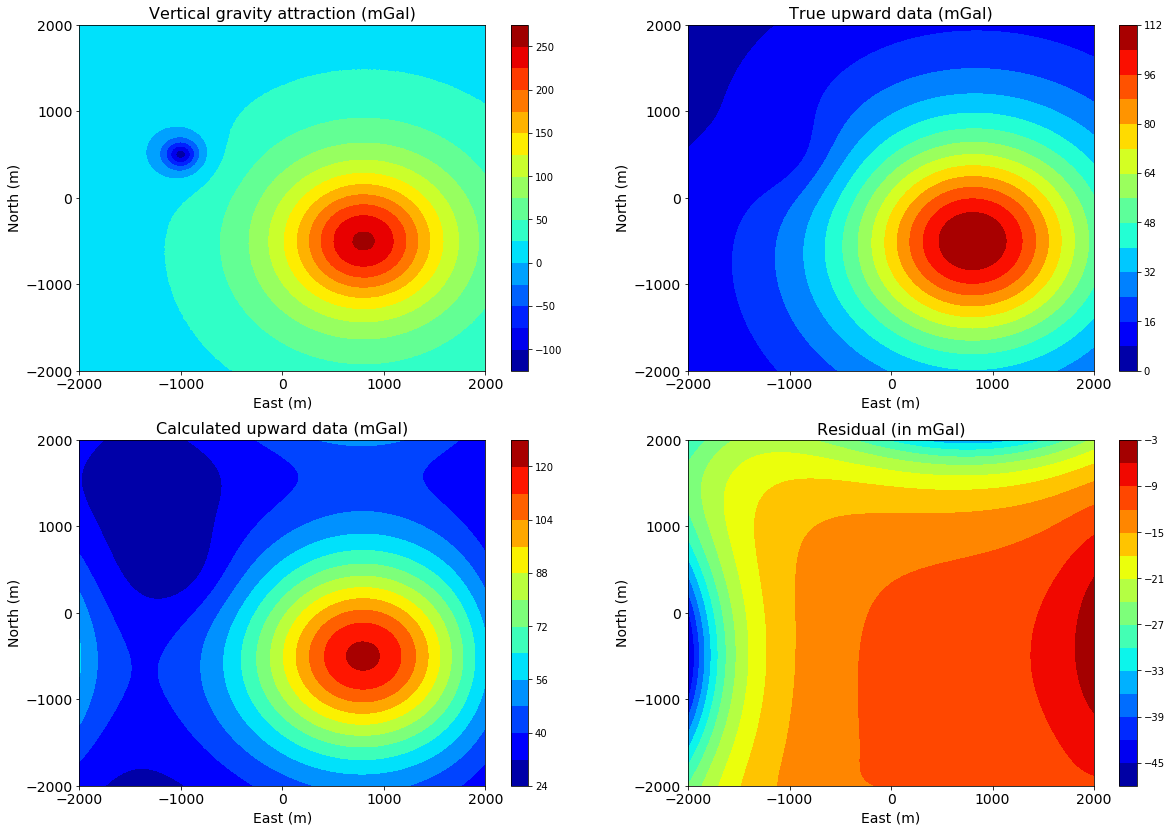

In [19]:
# Plotting the gravity data
plt.figure(figsize=(20,14))

plt.subplot(2,2,1)
plt.title('Vertical gravity attraction (mGal)', fontsize = 16)
plt.contourf(X, Y, data, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.arange(x.min(), x.max() + 1, 1000), fontsize = 14)
plt.yticks(np.arange(y.min(), y.max() + 1, 1000), fontsize = 14)
plt.colorbar()

plt.subplot(2,2,2)
plt.title('True upward data (mGal)', fontsize = 16)
plt.contourf(X, Y, gz_true, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.arange(x.min(), x.max() + 1, 1000),fontsize = 14)
plt.yticks(np.arange(y.min(), y.max() + 1, 1000),fontsize = 14)
plt.colorbar()

plt.subplot(2,2,3)
plt.title('Calculated upward data (mGal)', fontsize = 16)
plt.contourf(X, Y, gz_up, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.arange(x.min(), x.max() + 1, 1000),fontsize = 14)
plt.yticks(np.arange(y.min(), y.max() + 1, 1000),fontsize = 14)
plt.colorbar()

plt.subplot(2,2,4)
plt.title('Residual (in mGal)', fontsize = 16)
plt.contourf(X, Y, gz_true - gz_up, 15, cmap = plt.cm.jet)
plt.xlabel('East (m)', fontsize = 14)
plt.ylabel('North (m)', fontsize = 14)
plt.xticks(np.arange(x.min(), x.max() + 1, 1000),fontsize = 14)
plt.yticks(np.arange(y.min(), y.max() + 1, 1000),fontsize = 14)
plt.colorbar()

plt.savefig('figures/upward-cont.png', facecolor='w', edgecolor='w', bbox_inches='tight')
plt.show()